In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import glob
import os

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table, Column, join
from astropy.wcs import WCS
import astropy.units as u

# from specutils.manipulation import box_smooth, gaussian_smooth, trapezoid_smooth
# from specutils.manipulation import median_smooth

from scipy.signal import medfilt
from scipy.signal import savgol_filter
from scipy.ndimage import median_filter


In [2]:
# Plotting Parameters
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] =18
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['ytick.minor.size'] = 5

In [3]:
# Reduced data in txt files
data_path = "A:/Documents/Grad_School/Research/IGRINS_Merged/"
fig_path = "A:/Documents/Grad_School/IGRINS-Spectra/IGRINS_figs/hops_spectra/"

# Create the folder if it doesn't exist
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

In [4]:
merged_hops_files = glob.glob(data_path+"mHOPS*.txt")
merged_hops_files

['A:/Documents/Grad_School/Research/IGRINS_Merged\\mHOPS132_30102016_K_0091_spec_A0v.txt',
 'A:/Documents/Grad_School/Research/IGRINS_Merged\\mHOPS194_30102016_K_0075_spec_A0v.txt',
 'A:/Documents/Grad_School/Research/IGRINS_Merged\\mHOPS294_20163010_K_0081_spec_A0v.txt',
 'A:/Documents/Grad_School/Research/IGRINS_Merged\\mHOPS357_20180115_K_0051_spec_A0v.txt',
 'A:/Documents/Grad_School/Research/IGRINS_Merged\\mHOPS388_20181120_K_0091.txt']

In [5]:
# NIR Lines in micron
nir_dict = {
    "Fe-2.084": 2.084,
    "Si-2.092"	:	2.092,
    "Mg-2.106"	:	2.106,
    "Al-2.11"	:	2.11,
    "Ca-2.2035"	:	2.2035,
    "Fe-2.2037"	:	2.2037,
    "Sc-2.2052"	:	2.2052,
    "Na-2.2052"	:	2.2052,
    "Si-2.2063"	:	2.2063,
    "Sc-2.2065"	:	2.2065,
    "Si-2.2073"	:	2.2073,
    "Fe-2.2079"	:	2.2079,
    "Na-2.2083"	:	2.2083,
    "Ca-2.2113"	:	2.2113,
    "Br-Gamma"  :   2.1655,
    "Ti-2.2218"	:	2.2218,
    "Ti-2.224"	:	2.224,
    "Fe-2.226"	:	2.226,
    "Ti-2.228"	:	2.228,
    "Ti-2.232"	:	2.232,
    "Ca-2.26573"	:	2.26573,
    "Fe-2.2742"	:	2.2742,
    "Mg-2.281"	:	2.281,
    "Ca-2.2825"	:	2.2825,
    "Fe-2.284"	:	2.284,
    "Ti-2.29"	:	2.29,
    "Ti-2.297"	:	2.297,
    "CO(2-0)-2.29353" :	2.29353,
    "CO(2-0)-2.32265"	:	2.32265,
    "CO(2-0)-2.34327" :	2.34327,
    "CO(2-0)-2.34531" :	2.34531,
    "CO(2-0)-2.3495" 	:	2.3495,
    "CO(2-0)-2.35167"	:	2.35167,
    "CO(2-0)-2.35246" :	2.35246,
    "CO(2-0)-2.38295" :	2.38295,
}

# Strings of the Nir lines
lines_str = list(nir_dict.keys())

# Wavelength values for each NIR line
lines_wav = list(nir_dict.values())

In [6]:
# Pandas Column IDs
igrins_cols = ['Wavelength', 'Flux', 'SNR','zero']

# Apply median filtering to the flux column
window_size = 1001  # Size of the median filter window

# HOPS-132
hops132_df = pd.read_csv(merged_hops_files[0], delimiter='\s+', comment='#', names = igrins_cols)
# SNR column is an object for some reason, change to float
hops132_df['SNR'] = hops132_df['SNR'].astype(float)

# No negative flux and require SNR > 5
hops132_df = hops132_df[(hops132_df['Flux'] > 0) & (hops132_df['SNR'] > 5) & (hops132_df['SNR'] < 10000)] 

# Wavelength + Flux Arrays
hops132_wavlen = hops132_df['Wavelength']
hops132_flux = hops132_df['Flux']
# # Median Filter
hops132_medflux = median_filter(hops132_flux,size=window_size)
##################

# HOPS-194
hops194_df = pd.read_csv(merged_hops_files[1], delimiter='\s+', comment='#', names = igrins_cols)
# SNR column is an object for some reason, change to float
hops194_df['SNR'] = hops194_df['SNR'].astype(float)

# No negative flux and require SNR > 5
hops194_df = hops194_df[(hops194_df['Flux'] > 0) & (hops194_df['SNR'] > 5) & (hops194_df['SNR'] < 10000)] 

# Wavelength + Flux Arrays
hops194_wavlen = hops194_df['Wavelength']
hops194_flux = hops194_df['Flux']
# # Median Filter
hops194_medflux = median_filter(hops194_flux,size=window_size)
##################

# HOPS-294
hops294_df = pd.read_csv(merged_hops_files[2], delimiter='\s+', comment='#', names = igrins_cols)
# SNR column is in string for some reason, change to float
hops294_df['SNR'] = hops294_df['SNR'].astype(float)

# No negative flux and require SNR > 5
hops294_df = hops294_df[(hops294_df['Flux'] > 0) & (hops294_df['SNR'] > 5) & (hops294_df['SNR'] < 10000)] 

# Wavelength + Flux Arrays
hops294_wavlen = hops294_df['Wavelength']
hops294_flux = hops294_df['Flux']
# # Median Filter
hops294_medflux = median_filter(hops294_flux,size=window_size)
##################

# HOPS-357
hops357_df = pd.read_csv(merged_hops_files[3], delimiter='\s+', comment='#', names = igrins_cols)
# SNR column is in string for some reason, change to float
hops357_df['SNR'] = hops357_df['SNR'].astype(float)

# No negative flux and require SNR > 5
hops357_df = hops357_df[(hops357_df['Flux'] > 0) & (hops357_df['SNR'] > 5) & (hops357_df['SNR'] < 10000)] 

# Wavelength + Flux Arrays
hops357_wavlen = hops357_df['Wavelength']
hops357_flux = hops357_df['Flux']
# # Median Filter
hops357_medflux = median_filter(hops357_flux,size=window_size)
##################

# HOPS-388
hops388_df = pd.read_csv(merged_hops_files[4], delimiter='\s+', comment='#', names = igrins_cols)
# SNR column is in string for some reason, change to float
hops388_df['SNR'] = hops388_df['SNR'].astype(float)

# No negative flux and require SNR > 5
hops388_df = hops388_df[(hops388_df['Flux'] > 0) & (hops388_df['SNR'] > 5) & (hops388_df['SNR'] < 10000)] 

# Wavelength + Flux Arrays
hops388_wavlen = hops388_df['Wavelength']
hops388_flux = hops388_df['Flux']
# # Median Filter
hops388_medflux = median_filter(hops388_flux,size=window_size)


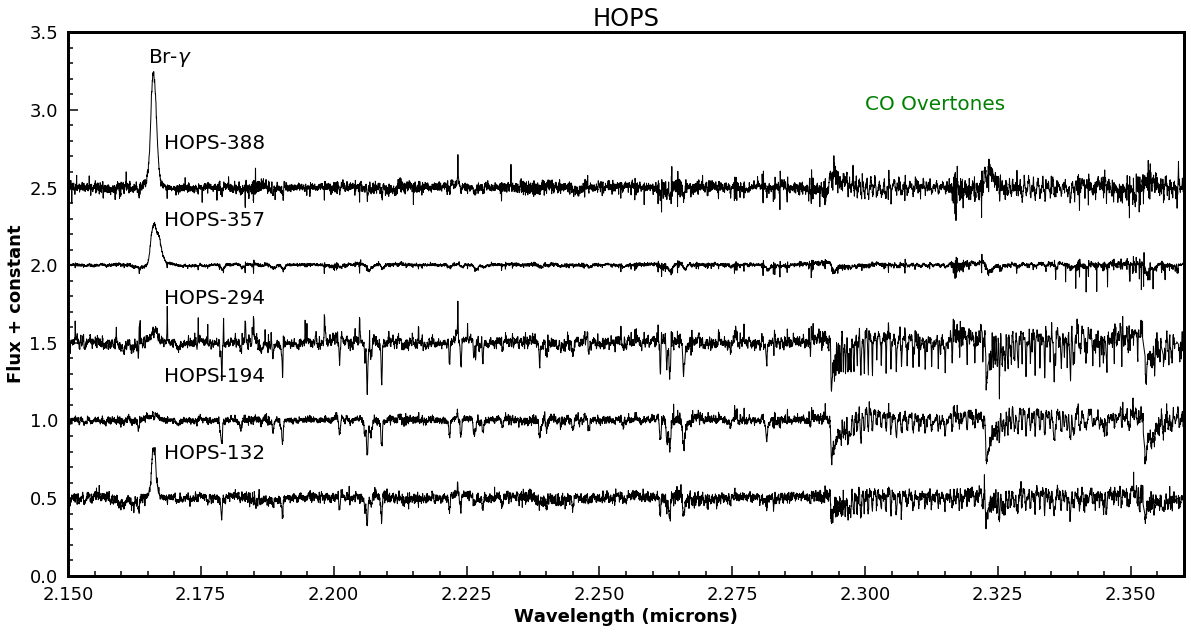

In [29]:
# Comment later because you're a lazy bum
fig,ax = plt.subplots(figsize=(20,10))
# Plot wavelength and flux + constant to have all the spectrum on one plot

# SciPy Savitzky-Golay filter settings
filt_window = 101
poly_order = 3

plt.plot(hops388_wavlen,savgol_filter(hops388_flux/hops388_medflux+1.5, window_length=filt_window, polyorder=poly_order), linewidth=1,c='black')
ax.text(2.168,2.75,'HOPS-388')

plt.plot(hops357_wavlen,savgol_filter(hops357_flux/hops357_medflux+1, window_length=filt_window, polyorder=poly_order),linewidth=1,c='black')
ax.text(2.168,2.25,'HOPS-357')

plt.plot(hops294_wavlen,savgol_filter(hops294_flux/hops294_medflux+0.5, window_length=filt_window, polyorder=poly_order),linewidth=1,c='black')
ax.text(2.168,1.75,'HOPS-294')

plt.plot(hops194_wavlen,savgol_filter(hops194_flux/hops194_medflux, window_length=filt_window, polyorder=poly_order),linewidth=1,c='black')
ax.text(2.168,1.25,'HOPS-194')

plt.plot(hops132_wavlen,savgol_filter(hops132_flux/hops132_medflux-0.5, window_length=filt_window, polyorder=poly_order),linewidth=1,c='black')
ax.text(2.168,0.75,'HOPS-132')

# CO Overtones
ax.text(2.3,3,'CO Overtones',color='g')

# Br-gamma
ax.text(2.165,3.3,'Br-$\gamma$')
# ax.set_xscale('log')
# ax.set_yscale('log')

# Add minor ticks
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

# Set the tick parameters
ax.tick_params(axis='both', which='major', direction='in', width=1.5, length=10, pad=10)
ax.tick_params(axis='both', which='minor', direction='in', width=1.5, length=5, pad=10)

# 2.25
plt.xlim(2.15,2.36)
plt.ylim(0,3.5)

plt.xlabel('Wavelength (microns)')
plt.ylabel('Flux + constant')
# plt.legend()
plt.title('HOPS')
plt.savefig(fig_path+'hops_overplot.png')

plt.show()

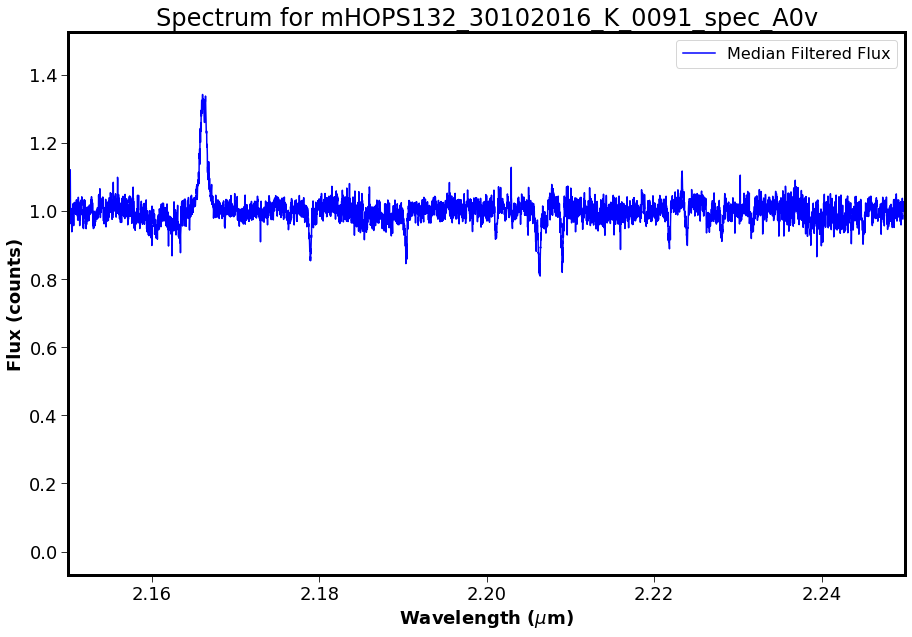

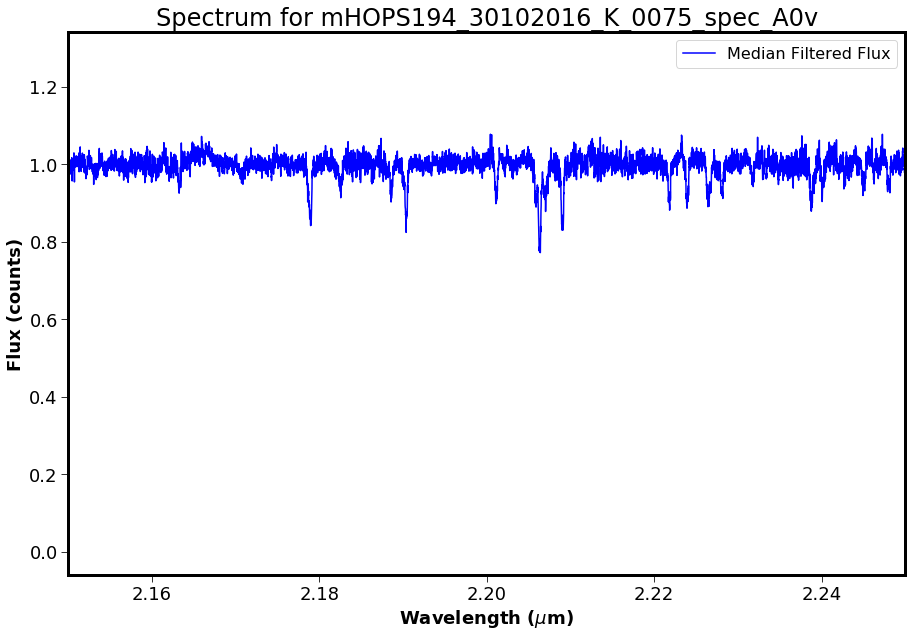

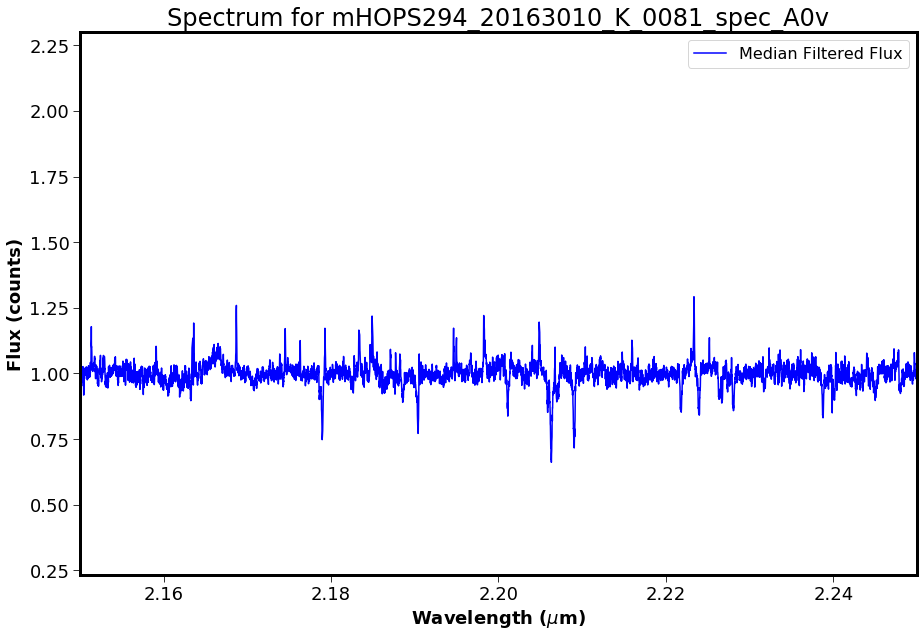

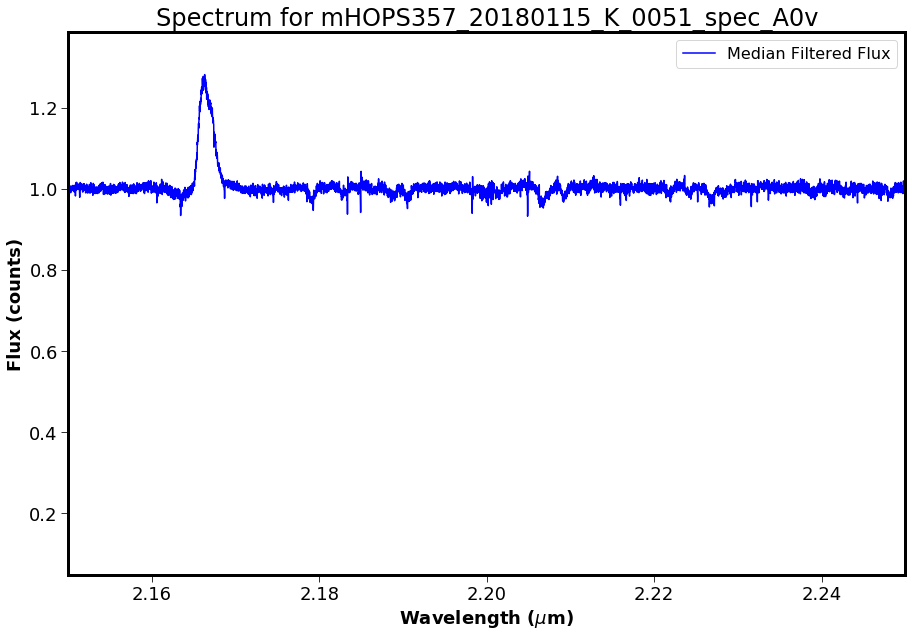

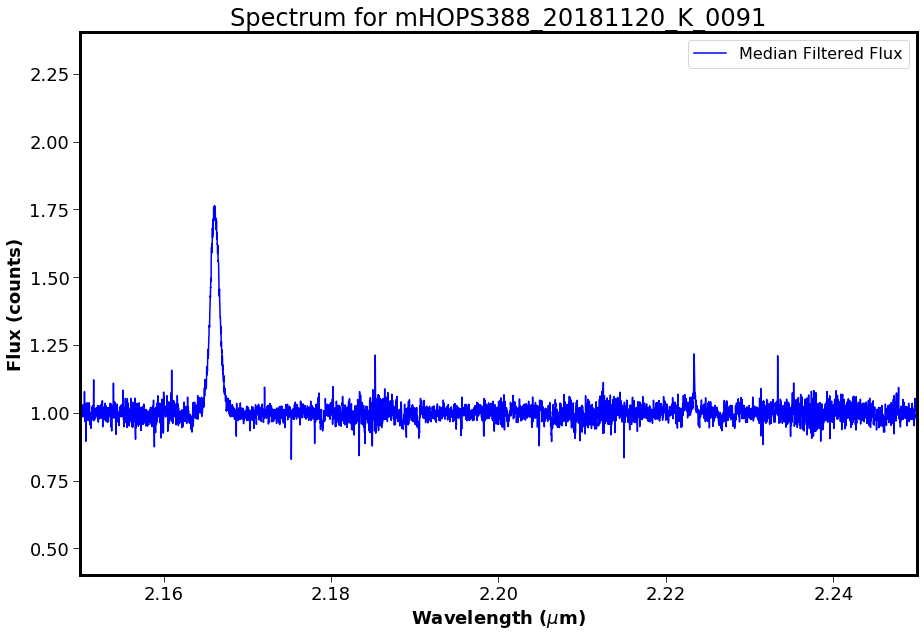

In [ ]:
# n = len(merged_hops_files)
# for file in merged_hops_files:
#     # Read the data from the TXT file using pandas
#     df = pd.read_csv(file, delimiter='\s+', comment='#', header=None)  # Adjust delimiter if necessary
#     # For some weird reason column 3 has dtype 'object' so I change it to 'float64'
#     df[2] = df[2].astype(float)
#     # Exclude any negative flux, anything with  10000 < SNR < 5 only because I don't actually know what the 3rd column is
#     df = df[(df[1] > 0) & (df[2] >= 5) & (df[2] <= 10000)]
#     # Extract wavelength and flux columns
#     wavelength = df[0]
#     flux = df[1]

#     # SNR per res element
#     snr = df[2]

#     # Apply median filtering to the flux column
#     window_size = 1001  # Size of the median filter window
#     filtered_flux = median_filter(flux, size=window_size)

#     # Create a plot of wavelength vs. flux
#     fig,ax = plt.subplots(figsize=(15,10))

#     # ax.plot(wavelength, flux,c='black')
#     # ax.plot(wavelength, flux,c='black',label='Original Flux')
#     ax.plot(wavelength, flux/filtered_flux,c='blue', label='Median Filtered Flux')

#     # Loop through NIR line dictionary and plot vertical, dashed lines at those wavelengths
#     # Iterate over number of objects
#     # for i in range(n):
#     #     # Iterate over the NIR dictionary
#     #     for lines_string, lines_wavelength in nir_dict.items():
#     #         # Plot vertical dashed line at the wavelength for each spectral line
#     #         ax.axvline(x=lines_wavelength,ls='dashed',color='red',alpha=0.2)

#     #         # text_offset = 0.02 * (ax.get_ylim()[1] - ax.get_ylim()[0])  # Adjust the offset as needed
#     #         # ax.text(lines_string, ax.get_ylim()[1] - text_offset, lines_string, rotation=0, verticalalignment='top')
#     #         # ax.set_xscale('log')
#     #         # ax.set_yscale('log')
    
#     # plt.xlim(2.15,2.25)
#     ax.set_xlim(2.15,2.25)
#     # ax.set_xscale('log')
#     # ax.set_yscale('log')
    
#     ax.set_xlabel('Wavelength ($\mu$m)')
#     ax.set_ylabel('Flux (counts)')

#     # Extract the filename from the path
#     filename = os.path.splitext(os.path.basename(file))[0]
#     # Make the title according to the filename
#     ax.set_title('Spectrum for {}'.format(filename))
#     ax.legend()

#     # Save the plot as PNG
#     plt.savefig(fig_path+'{}.png'.format(filename))
#     # Show the plot
#     plt.show()
#     # Don't show the plots, save me some scrolling time and I can always look at them in the file explorer
#     # plt.close()